In [87]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = 'Malgun Gothic'

# 확률론적 생성모형

확률론적 생성모형은 베이즈 정리를 사용해 조건부 확률$p(y=k|x)$을 계산한다.

$$P(y = k|x) = \dfrac{P(x|y=k)P(y=k)}{P(x)}$$

즉, 가능도 $P(x|y=k)$를 이용해 주어진 $x$에 대한 $y$의 확률분포를 찾아내는 것이다.

예를 들어 남성과 여성에 대한 신장이 조사되었다고 가정하자.

남성의 경우 173cm에서 $\pm$ 5cm 의 분포를 띈다.

여성의 경우는 160cm에서 $\pm$ 5cm의 분포를 띈다.

위의 두 경우에 대한 신장의 분포를 알고 있다면 다음과 같은 문제를 해결할 수 있을 것이다.

남성의 일반적인 신장에 대한 예시를 말해보아라.

정답 : 170.5, 172.3, 175.7, ...


이처럼 생성모델은 확률분포를 학습해 $x$가 주어졌을 때의 $y$값을 예측하는 모형이다.

위의 조건부 확률에서 분류문제를 해결하는 방법은 각 클래스 $k$에 대해 가장 확률이 큰 값을 선택하는 것이다.

$P(y=0|x) = 0.2$

$P(y=1|x) = 0.4$

$P(y=2|x) = 0.3$

$P(y=3|x) = 0.1$

그런데 분류문제를 해결하기 위해서 꼭 확률이 필요한 것은 아니다. 단지 어떤 클래스에 대한 확률이 가장 큰 값을 가지는지를 확인하면 되는 것이다.

따라서 굳이 확률로 표시하지 않아도 비교가 가능하므로 비례표시를 이용해 다음과 같이 수식을 표현할 수 있다.

$$P(y = k \mid x) \;\; \propto \;\; P(x \mid y = k) \; P(y = k)$$

이러한 이유로 베이즈 정리에서의 $P(x)$는 계산하지 않아도 된다.

**사전확률**의 경우 $P(y=k)$에 대한 특별한 정보가 없다면 다음과 같이 계산할 수 있다.

$$P(y=k) \approx \dfrac{1}{경우의수}$$

하지만 학습용 데이터가 존재하는 경우 적어도 1/2보다는 논리적인 사전확률을 얻을 수 있다.

예를 들어 100개의 감기환자 조사에 대한 sample이 있다고 가정하 때 감기환자가 10명으로 집계되었다면 어떤 임의의 사람이 감기에 걸렸을 확률은 1/10이 된다.

$$P(y=k) \approx \dfrac{y=k인 데이터의 수}{모든 data의 수}$$

다음은 $y$에 대한 $x$의 조건부확률인 가능도를 계산하는 방법이다.

가능도를 계산하는 것은 확률론적 생성 모델의 핵심이며 이를 어떻게 계산하였느냐에 따라 LDA, QDA, Multinomial Naive Bayse 등등으로 불리게 된다.

가능도 계산 방법

1. $P(x|y=k)$가 특정한 확률분포 모형을 따른다고 가정한다. 즉, PDF의 형태를 가정한다.(일반적으로 정규분포를 사용한다.)


2. $K$번째 클래스에 속하는 학습데이터 $[x_1, ..., x_N]$를 사용해 모형의 모수값을 추정한다 만약 가우시안 정규분포라면 $\mu, \sigma^2$가 된다.


3. 이를 기반으로 $x$값이 주어졌을 때의 확률을 구한다. $P(x)$

다음의 예시를 통해 정상인과 감기환자의 체온에 대한 분포가 정규분포를 따른다고 가정하고 특정 체온($x$)가 주어졌을 때 그 분포에 속할 확률을 계산하면 다음과 같다.

In [60]:
import scipy as sp
import scipy.stats

rv_normal = sp.stats.norm(loc=36.5, scale=0.2)
rv_normal.pdf(36.9), rv_normal.pdf(40)

(0.2699548325659441, 6.288361914390968e-67)

In [61]:
rv_flu = sp.stats.norm(loc=38.2, scale=0.2)
rv_flu.pdf(38.5), rv_flu.pdf(36.5)

(0.6475879783294726, 4.083117815834282e-16)

# QDA

QDA(Quadratic Discriminant Analysis) : 이차판별분석법은 독립변수 $x$가 실수이고 확률분포가 **다변수정규분포**라고 가정한다.
    
$$p(x \mid y = k) = \dfrac{1}{(2\pi)^{D/2} |\Sigma_k|^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu_k)^T \Sigma_k^{-1} (x-\mu_k) \right)$$

이 분포를 이용해 독립변수 $x$에 대한 $y$ 클래스의 조건부확률분포를 다음과 같이 베이즈 정리와 전체 확률의 법칙으로 구할 수 있다.

**단, 다변수정규분포의 모수 $\mu, \Sigma$를 알면 PDF의 모양을 알 수 있지만 CLASS 값에 따라 그 모양이 다르다는 것에 유의해야한다.**

$$P(y=k \mid x) = \dfrac{p(x \mid y = k)P(y=k)}{p(x)} = \dfrac{p(x \mid y = k)P(y=k)}{\sum_l p(x \mid y = l)P(y=l) }$$

예를 들어 $y$가 1, 2, 3인 세개의 클래스를 가지고 각 클래스에서의 $x$의 확률분포가 다음의 기댓값과 공분산행렬을 가진다면

$$\begin{split}
\mu_1 = \begin{bmatrix}  0 \\ 0 \end{bmatrix}, \;\;
\mu_2 = \begin{bmatrix}  1 \\ 1 \end{bmatrix}, \;\;
\mu_3 = \begin{bmatrix}-1  \\ 1 \end{bmatrix}
\end{split}$$

$$\begin{split}
\Sigma_1 = \begin{bmatrix} 0.7 &   0 \\ 0   & 0.7 \end{bmatrix}, \;\;
\Sigma_2 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}, \;\;
\Sigma_3 = \begin{bmatrix} 0.8 & 0.2 \\ 0.2 & 0.8 \end{bmatrix}
\end{split}$$

$y$의 사전확률(prior)는 다음과 같이 동일하다.

$$P(Y=1) = P(Y=2) = P(Y=3) = \dfrac{1}{3}$$

In [62]:
sns.set_style('whitegrid')

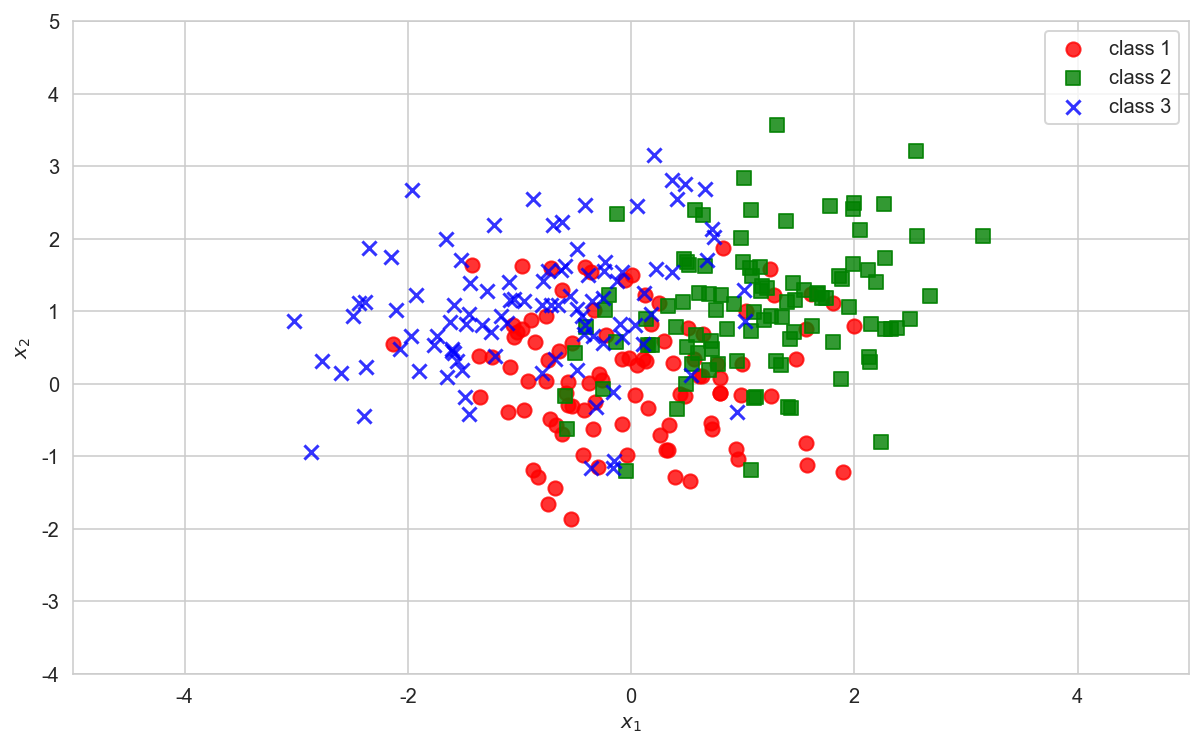

In [77]:
N = 100

mu1 = np.array([0, 0])
mu2 = np.array([1, 1])
mu3 = np.array([-1, 1])

S1 = np.array([[0.7, 0.0], [0.0, 0.7]])
S2 = np.array([[0.8, 0.2], [0.2, 0.8]])
S3 = np.array([[0.8, 0.2], [0.2, 0.8]])

rv1 = sp.stats.multivariate_normal(mu1, S1)
rv2 = sp.stats.multivariate_normal(mu2, S2)
rv3 = sp.stats.multivariate_normal(mu3, S3)

np.random.seed(0)

X1 = rv1.rvs(N)
X2 = rv2.rvs(N)
X3 = rv3.rvs(N)

y1 = np.zeros(N)
y2 = np.ones(N)
y3 = np.ones(N) * 2

X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])

plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="class 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="class 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="class 3")
plt.xlim(-5, 5)
plt.ylim(-4, 5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

sklearn에서는 QDA를 위해 `QuadraticDiscriminantAnalysis` 클래스를 제공한다.

In [75]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

- priors_ : 각 클래스 $k$의 사전확률

- means_ : 각 클래스 $k$에서의 $x$의 기댓값 벡터, $\mu_k$의 추정치 벡터

- covariance_ : 각 클래스 $k$에서 $x$의 공분산행렬 $\Sigma_k$의 추정치 행렬

In [65]:
qda.priors_

array([0.33333333, 0.33333333, 0.33333333])

In [66]:
qda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [67]:
qda.covariance_[0], qda.covariance_[1], qda.covariance_[2]

(array([[ 0.73846319, -0.01762041],
        [-0.01762041,  0.72961278]]),
 array([[0.66534246, 0.21132313],
        [0.21132313, 0.78806006]]),
 array([[0.9351386 , 0.22880955],
        [0.22880955, 0.79142383]]))

이 확률분포를 이용해 분류한 결과는 다음과 같다.

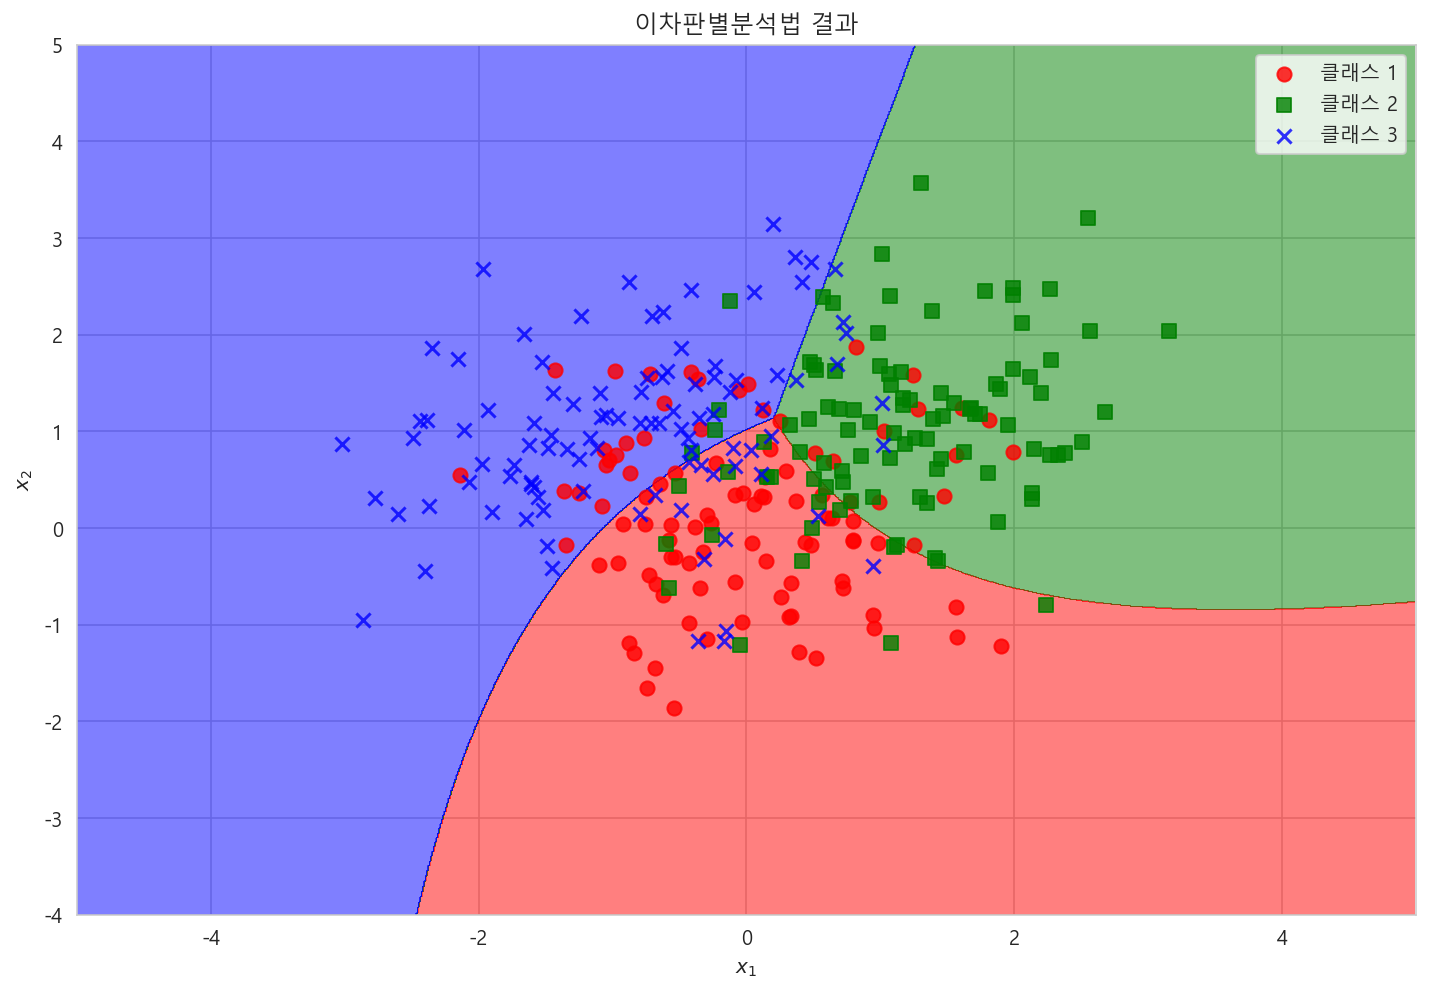

In [88]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(qda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())

plt.figure(figsize=(12, 8))
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("이차판별분석법 결과")
plt.legend()
plt.show()

# QDA를 이용한 IRIS 데이터 분류

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data
y1 = iris.target

In [70]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X1, y1)
pred = model.predict(X1)

from sklearn.metrics import confusion_matrix

confusion_matrix(y1, pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y1, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



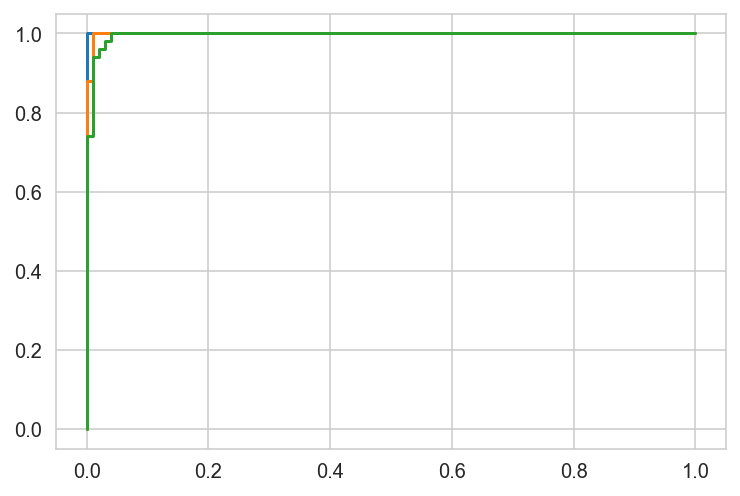

In [72]:
from sklearn.preprocessing import label_binarize

y1_vec = label_binarize(y1, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = QuadraticDiscriminantAnalysis().fit(X1, y1_vec[:, i])
    fpr, tpr, thr = roc_curve(y1_vec[:, i], model.predict_proba(X1)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

# LDA

선형판별분석법(Linear Discriminant Analysis)는 각 $y$ 클래스에 대한 독립변수 $X$의 조건부확률분포가 공통된 공분산 행렬을 가지는 다변수 정규분포라고 가정한다.

QDA와 LDA의 가장 큰 차이점은 LDA에서의 $\Sigma$는 모든 $k$에 대해 같다는 가정이다.

LDA는 판별함수가 $x$에 대한 선형방정식이 되고 경계선 모양이 직선을 이룬다.

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2, solver="svd", store_covariance=True).fit(X, y)

In [91]:
lda.means_

array([[-8.01254084e-04,  1.19457204e-01],
       [ 1.16303727e+00,  1.03930605e+00],
       [-8.64060404e-01,  1.02295794e+00]])

In [93]:
lda.covariance_

array([[0.7718516 , 0.13942905],
       [0.13942905, 0.7620019 ]])

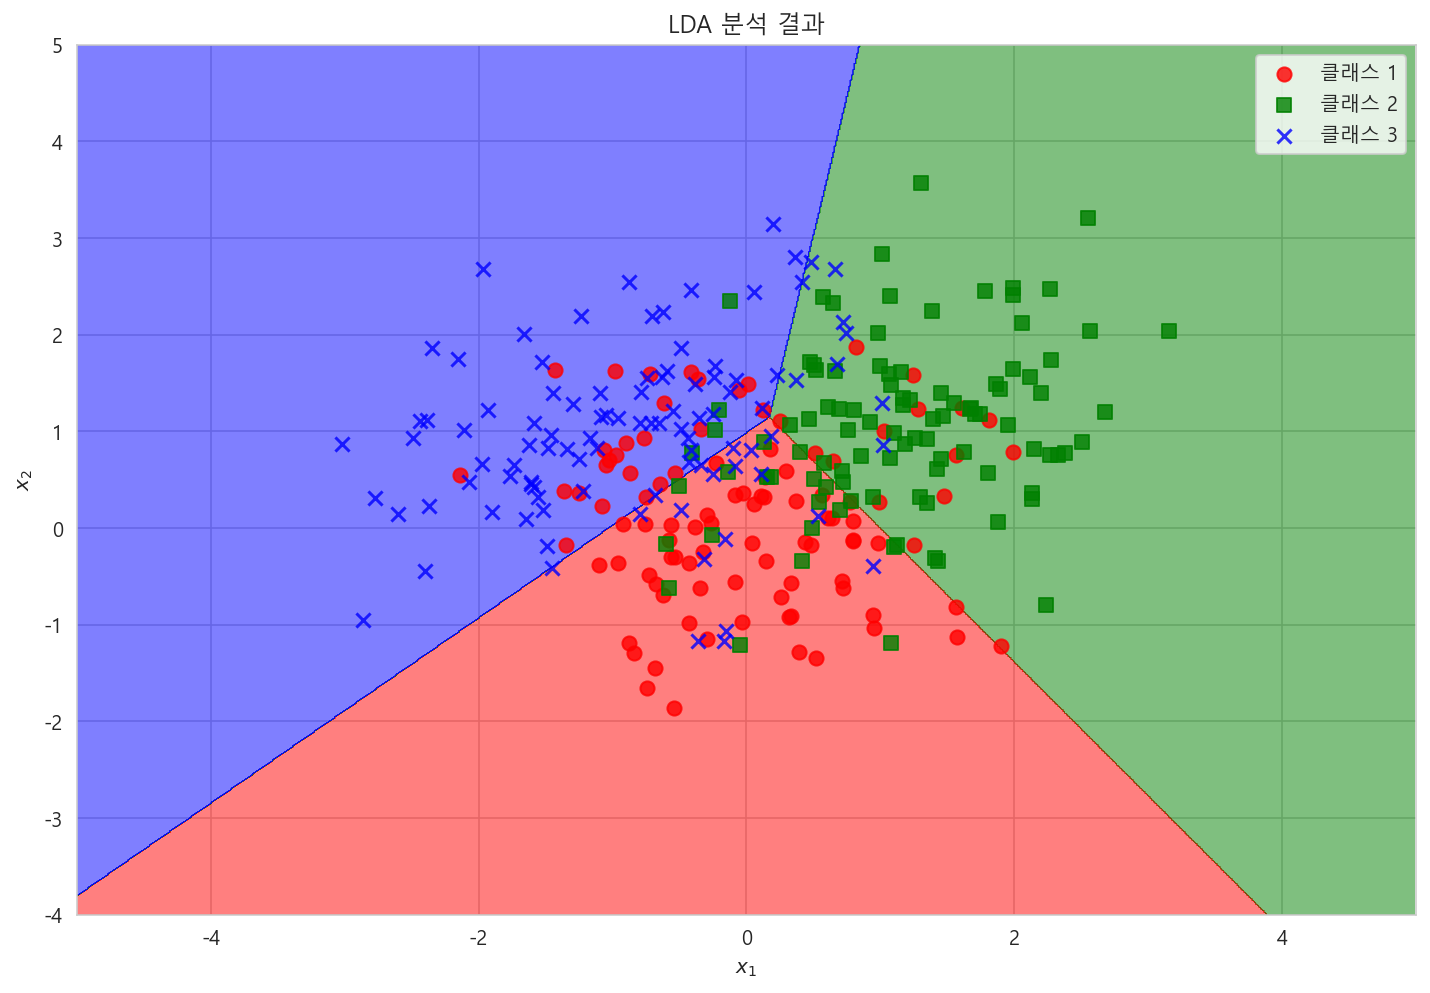

In [90]:
x1min, x1max = -5, 5
x2min, x2max = -4, 5
XX1, XX2 = np.meshgrid(np.arange(x1min, x1max, (x1max-x1min)/1000),
                       np.arange(x2min, x2max, (x2max-x2min)/1000))
YY = np.reshape(lda.predict(np.array([XX1.ravel(), XX2.ravel()]).T), XX1.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette(["r", "g", "b"]).as_hex())
plt.figure(figsize=(12, 8))
plt.contourf(XX1, XX2, YY, cmap=cmap, alpha=0.5)
plt.scatter(X1[:, 0], X1[:, 1], alpha=0.8, s=50, marker="o", color='r', label="클래스 1")
plt.scatter(X2[:, 0], X2[:, 1], alpha=0.8, s=50, marker="s", color='g', label="클래스 2")
plt.scatter(X3[:, 0], X3[:, 1], alpha=0.8, s=50, marker="x", color='b', label="클래스 3")
plt.xlim(x1min, x1max)
plt.ylim(x2min, x2max)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.title("LDA 분석 결과")
plt.show()

# LDA를 이용한 IRIS 데이터 분류

In [95]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data
y2 = iris.target

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

model = LinearDiscriminantAnalysis().fit(X2, y2)
y2_pred = model.predict(X2)

from sklearn.metrics import confusion_matrix

confusion_matrix(y2, y2_pred)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



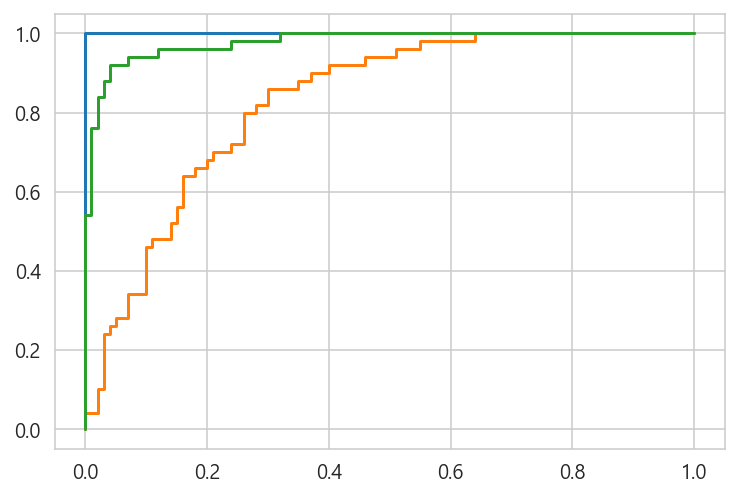

In [97]:
from sklearn.preprocessing import label_binarize

y2_vec = label_binarize(y2, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = LinearDiscriminantAnalysis().fit(X2, y2_vec[:, i])
    fpr, tpr, thr = roc_curve(y2_vec[:, i], model.predict_proba(X2)[:, 1])
    plt.plot(fpr, tpr)

plt.show()

이 글은 `데이터 사이언스 스쿨`을 공부하며 작성했습니다.